In [1]:
%pwd

'C:\\Users\\Carlo\\EE258_Project'

In [2]:
import os
for filenames in os.listdir('dataset/'):
        print(os.path.join("dataset/", filenames))

dataset/archive.zip
dataset/Rock-Paper-Scissors


In [3]:
import numpy as np 
import pandas as pd

import random

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img

import matplotlib.pyplot as plt

In [4]:
base_dir = os.path.join("dataset/Rock-Paper-Scissors")
print("Base directory --> ", os.listdir(base_dir))

Base directory -->  ['test', 'train', 'validation']


In [5]:
train_dir = os.path.join("dataset/Rock-Paper-Scissors/train/")
print("Train datapath contains: ", os.listdir(train_dir))


test_dir = os.path.join("dataset/Rock-Paper-Scissors/test/")
print("Test datapath contains: ", os.listdir(test_dir))


val_dir = os.path.join("dataset/Rock-Paper-Scissors/validation/")
print("Validation datapath contains: ", os.listdir(val_dir))

Train datapath contains:  ['paper', 'rock', 'scissors']
Test datapath contains:  ['paper', 'rock', 'scissors']
Validation datapath contains:  ['paper-hires1.png', 'paper-hires2.png', 'paper1.png', 'paper2.png', 'paper3.png', 'paper4.png', 'paper5.png', 'paper6.png', 'paper7.png', 'paper8.png', 'paper9.png', 'rock-hires1.png', 'rock-hires2.png', 'rock1.png', 'rock2.png', 'rock3.png', 'rock4.png', 'rock5.png', 'rock6.png', 'rock7.png', 'rock8.png', 'rock9.png', 'scissors-hires1.png', 'scissors-hires2.png', 'scissors1.png', 'scissors2.png', 'scissors3.png', 'scissors4.png', 'scissors5.png', 'scissors6.png', 'scissors7.png', 'scissors8.png', 'scissors9.png']


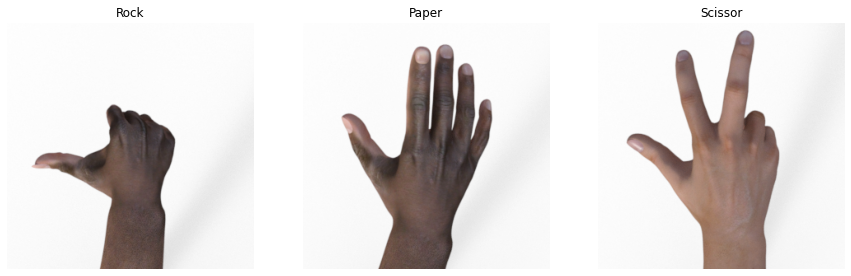

In [6]:
fig, ax = plt.subplots(1, 3, figsize=(15, 10))

sample_rock = random.choice(os.listdir(train_dir + "rock"))
image = load_img(train_dir + "rock/" + sample_rock)
ax[0].imshow(image)
ax[0].set_title("Rock")
ax[0].axis("Off")

sample_paper = random.choice(os.listdir(train_dir + "paper"))
image = load_img(train_dir + "paper/" + sample_paper)
ax[1].imshow(image)
ax[1].set_title("Paper")
ax[1].axis("Off")

sample_scissor = random.choice(os.listdir(train_dir + "scissors"))
image = load_img(train_dir + "scissors/" + sample_scissor)
ax[2].imshow(image)
ax[2].set_title("Scissor")
ax[2].axis("Off")

plt.show()

In [7]:
model = tf.keras.models.Sequential([
    
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    
    tf.keras.layers.Dense(3, activation='softmax')
])

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

In [9]:
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

In [10]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy')>0.95):
            print("\nReached >95% accuracy so cancelling training!")
            self.model.stop_training = True
        
callbacks = myCallback()

In [11]:
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2, # Shifting image width by 20%
      height_shift_range=0.2,# Shifting image height by 20%
      shear_range=0.2,       # Rotation across X-axis by 20%
      zoom_range=0.2,        # Image zooming by 20%
      horizontal_flip=True,
      fill_mode='nearest')

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (150, 150),
    class_mode = 'categorical',
    batch_size = 20
)

Found 2520 images belonging to 3 classes.


In [12]:
validation_datagen = ImageDataGenerator(rescale=1./255)

validation_generator = validation_datagen.flow_from_directory(
    test_dir,
    target_size = (150, 150),
    class_mode = 'categorical',
    batch_size = 20
)

Found 372 images belonging to 3 classes.


In [14]:
history = model.fit(
      train_generator,
      steps_per_epoch = np.ceil(2520/20),  # 2520 images = batch_size * steps
      epochs = 10,
      validation_data=validation_generator,
      validation_steps = np.ceil(372/20),  # 372 images = batch_size * steps
      callbacks=[callbacks],
      verbose = 2)

Epoch 1/10
126/126 - 37s - loss: 0.9840 - accuracy: 0.4667 - val_loss: 0.6201 - val_accuracy: 0.6452 - 37s/epoch - 295ms/step
Epoch 2/10
126/126 - 31s - loss: 0.6471 - accuracy: 0.7190 - val_loss: 0.2724 - val_accuracy: 0.9543 - 31s/epoch - 245ms/step
Epoch 3/10
126/126 - 28s - loss: 0.3624 - accuracy: 0.8611 - val_loss: 0.1005 - val_accuracy: 0.9866 - 28s/epoch - 226ms/step
Epoch 4/10
126/126 - 28s - loss: 0.2533 - accuracy: 0.9036 - val_loss: 0.1389 - val_accuracy: 0.9462 - 28s/epoch - 224ms/step
Epoch 5/10
126/126 - 28s - loss: 0.1723 - accuracy: 0.9357 - val_loss: 0.1263 - val_accuracy: 0.9086 - 28s/epoch - 223ms/step
Epoch 6/10

Reached >95% accuracy so cancelling training!
126/126 - 29s - loss: 0.1330 - accuracy: 0.9540 - val_loss: 0.1354 - val_accuracy: 0.9140 - 29s/epoch - 230ms/step
